## Data Analysis and Preprocessing

In [27]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

from models.scripts.utils import load_csv, drop_columns, impute_rolling_median, display_missing_values, save_to_csv

In [28]:
file_path = 'data/xmr_lunarcrush_timeseries_hourly.csv'

df = load_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   asset_id                   38656 non-null  int64         
 1   timestamp                  38656 non-null  int64         
 2   time                       38656 non-null  datetime64[ns]
 3   open                       38599 non-null  float64       
 4   close                      38656 non-null  float64       
 5   high                       38599 non-null  float64       
 6   low                        38599 non-null  float64       
 7   volume                     29967 non-null  float64       
 8   volume_24h                 30141 non-null  float64       
 9   market_cap                 38599 non-null  float64       
 10  circulating_supply         30408 non-null  float64       
 11  url_shares                 34437 non-null  float64       
 12  uniq

In [29]:
df.describe()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,medium,youtube,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance
count,38656.0,3.865600e+04,38656,38599.000000,38656.000000,38599.000000,38599.000000,2.996700e+04,3.014100e+04,3.859900e+04,...,105.0,1396.000000,32371.000000,16905.000000,16905.000000,38656.000000,37693.000000,37693.000000,3.788400e+04,37884.000000
mean,13.0,1.637494e+09,2021-11-21 11:27:47.849751808,156.249797,156.103833,157.199719,155.268292,1.194276e+07,3.718079e+08,2.816176e+09,...,1.0,1.047994,41.715486,2.308548,297.715173,34.823960,49688.855066,0.144220,1.166456e+12,0.299557
min,13.0,1.567037e+09,2019-08-29 00:00:00,29.057330,27.821283,29.689070,27.546213,4.676030e+05,2.749574e+07,5.250572e+08,...,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1567.000000,0.000704,1.223398e+11,0.072296
25%,13.0,1.602705e+09,2020-10-14 19:45:00,111.850900,112.323072,112.774840,110.989934,4.462608e+06,8.045971e+07,2.026008e+09,...,1.0,1.000000,17.000000,1.000000,21.000000,11.000000,14213.000000,0.024489,4.500118e+11,0.230324
50%,13.0,1.637494e+09,2021-11-21 11:30:00,152.740000,152.747968,153.344580,152.098948,7.393585e+06,1.373473e+08,2.779849e+09,...,1.0,1.000000,29.000000,2.000000,55.000000,21.000000,45174.000000,0.053077,1.090821e+12,0.258347
75%,13.0,1.672284e+09,2022-12-29 03:15:00,187.689582,187.345557,189.131209,186.299848,1.399328e+07,2.727409e+08,3.391864e+09,...,1.0,1.000000,53.000000,3.000000,164.000000,45.000000,73682.000000,0.122249,1.665817e+12,0.416605
max,13.0,1.707073e+09,2024-02-04 19:00:00,517.212653,515.621378,519.551289,502.109097,3.167994e+09,6.817766e+10,9.231744e+09,...,1.0,4.000000,1991.000000,55.000000,170756.000000,1172.000000,515359.000000,10.025039,7.290602e+12,0.641262
std,0.0,4.017324e+07,NaN,72.627910,72.293384,73.327274,71.873282,2.275628e+07,1.653441e+09,1.307963e+09,...,0.0,0.229983,45.310943,1.915028,1816.496397,45.211107,37620.298050,0.270188,7.158432e+11,0.108777


In [30]:
print("Number of null values per column:")
counts = df.count().to_frame()
counts.columns = ['count']
counts['nulls'] = df.shape[0] - counts['count']
counts

Number of null values per column:


,count,nulls
asset_id,38656,0
timestamp,38656,0
time,38656,0
open,38599,57
close,38656,0
...,...,...
social_volume,38656,0
social_volume_global,37693,963
social_dominance,37693,963
market_cap_global,37884,772


In [31]:
df.head()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,medium,youtube,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance
0,13,1567036800,2019-08-29,72.37,67.28,72.46,67.13,NaN,NaN,1.157065e+09,...,NaN,NaN,NaN,NaN,NaN,1041,NaN,NaN,NaN,NaN
1,13,1567123200,2019-08-30,66.69,68.75,70.00,66.17,NaN,NaN,1.166732e+09,...,NaN,NaN,NaN,NaN,NaN,1018,NaN,NaN,NaN,NaN
2,13,1567209600,2019-08-31,68.65,68.07,69.95,66.76,NaN,NaN,1.160993e+09,...,NaN,NaN,NaN,NaN,NaN,812,NaN,NaN,NaN,NaN
3,13,1567296000,2019-09-01,68.13,71.88,74.82,67.49,NaN,NaN,1.235596e+09,...,NaN,NaN,NaN,NaN,NaN,864,NaN,NaN,NaN,NaN
4,13,1567382400,2019-09-02,72.05,73.63,74.42,70.20,NaN,NaN,1.260071e+09,...,NaN,NaN,NaN,NaN,NaN,1172,NaN,NaN,NaN,NaN


### Data Visualization

In [32]:
def plot_price_and_volume(df):
    fig, ax1 = plt.subplots(figsize=(15, 5))

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Close Price', color=color)
    ax1.plot(df['time'], df['close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() 

    color = 'tab:blue'
    ax2.set_ylabel('Volume', color=color)
    ax2.plot(df['time'], df['volume'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Close Price and Volume Trend')
    plt.show()

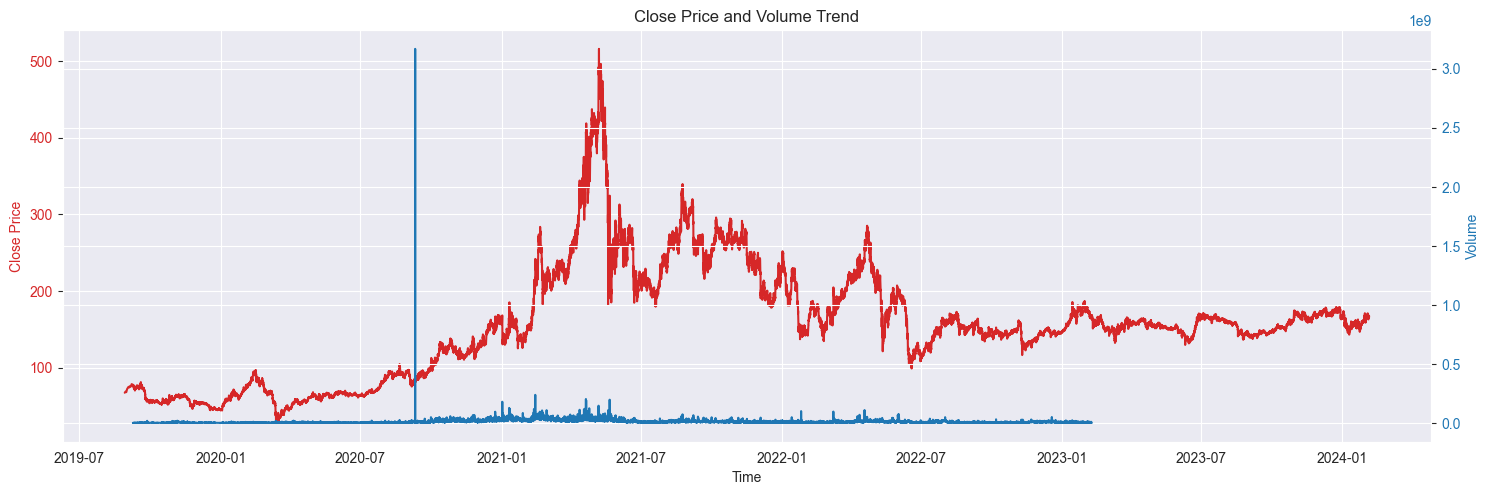

In [33]:
plot_price_and_volume(df)

In [34]:
def plot_social_media_sentiment(df):
    fig, ax1 = plt.subplots(figsize=(15, 5))

    color = 'tab:green'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Tweets', color=color)
    ax1.plot(df['time'], df['tweets'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.set_ylabel('Social Score', color=color)
    ax2.plot(df['time'], df['social_score'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Social Media Sentiment: Tweets and Social Score')
    plt.show()

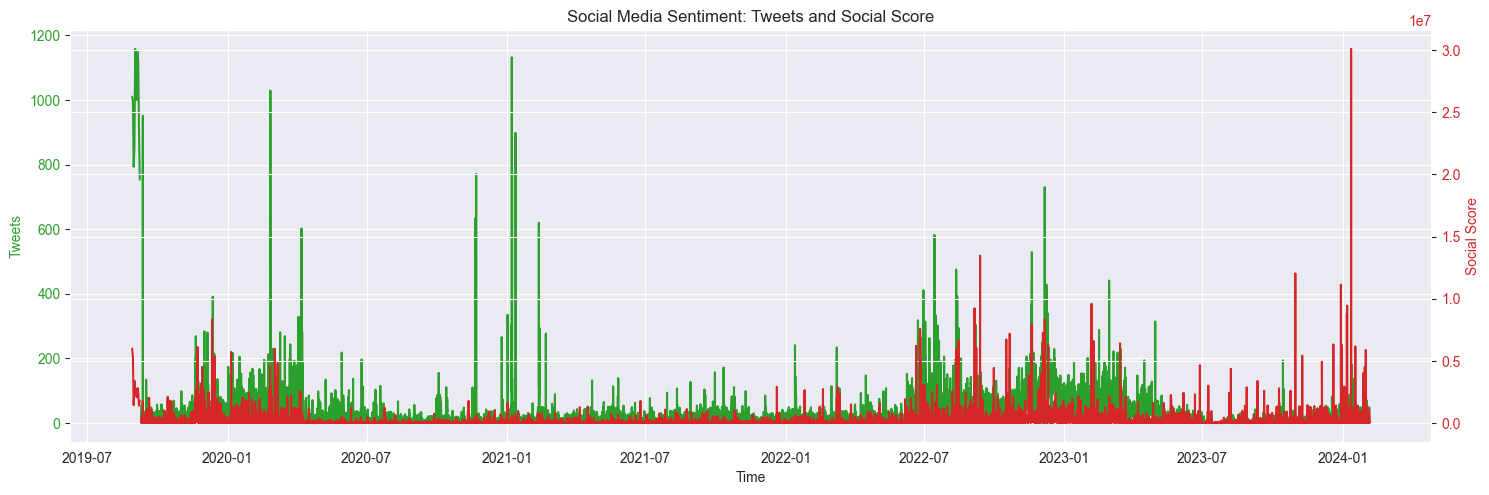

In [35]:
plot_social_media_sentiment(df)

In [36]:
def plot_time_series_sentiment_vs_price(df, sentiment_score, price='close'):
    """
    Generates a time series plot overlaying sentiment scores with price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including 'time', a sentiment score, and price.
    - sentiment_score: The column name of the sentiment score to plot.
    - price: The column name of the price to plot (default is 'close').
    """
    # Creating a figure and a twin axis for the second plot
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel(sentiment_score, color=color)
    ax1.plot(df['time'], df[sentiment_score], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(price, color=color)  # we already handled the x-label with ax1
    ax2.plot(df['time'], df[price], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Time Series of {sentiment_score} and {price}')
    plt.show()

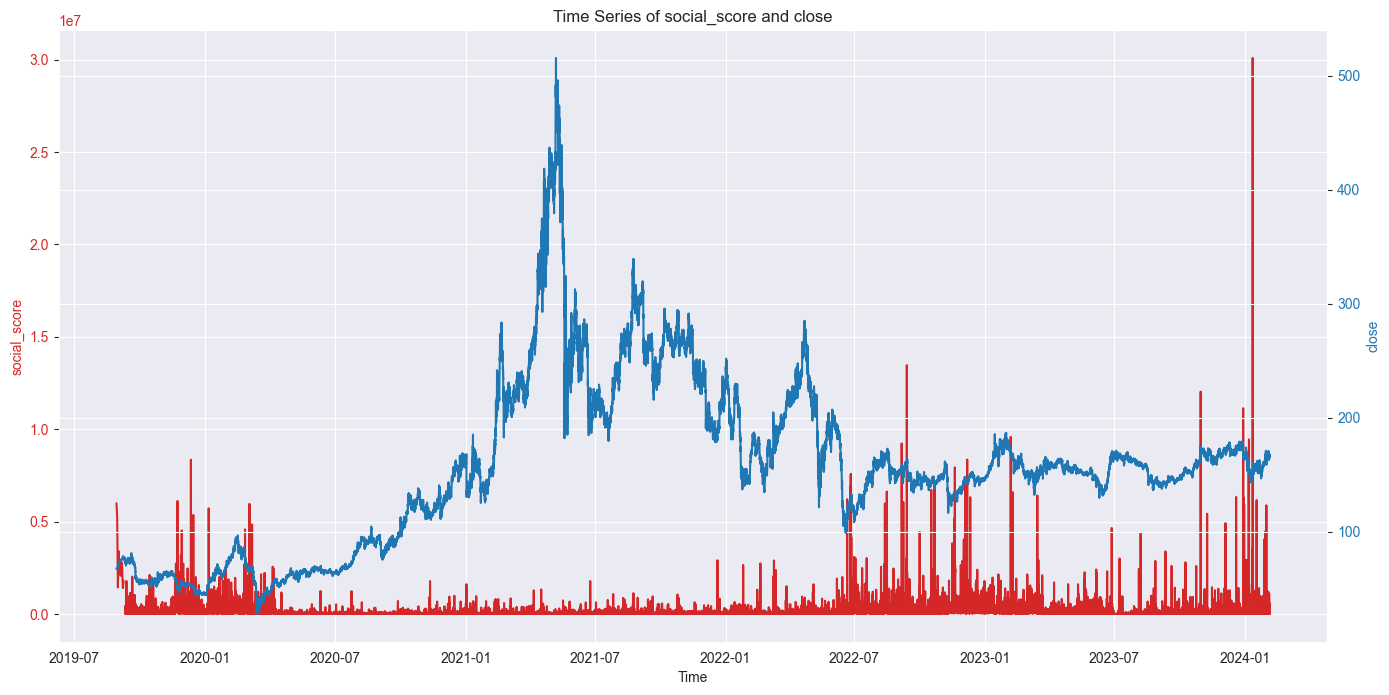

In [37]:
plot_time_series_sentiment_vs_price(df, 'social_score')

In [38]:
def plot_histogram(df, column_name, bins=30, color='skyblue'):
    """
    Plots a histogram for a specific column in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: String, the name of the column to plot.
    - bins: Integer, the number of bins to use in the histogram.
    - color: String, the color of the histogram bars.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], bins=bins, kde=False, color=color)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [39]:
def plot_density_plot(df, column_name, color='orange'):
    """
    Plots a density plot for a specific column in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: String, the name of the column to plot.
    - color: String, the color of the density line.
    """
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column_name], color=color, fill=True)
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.show()

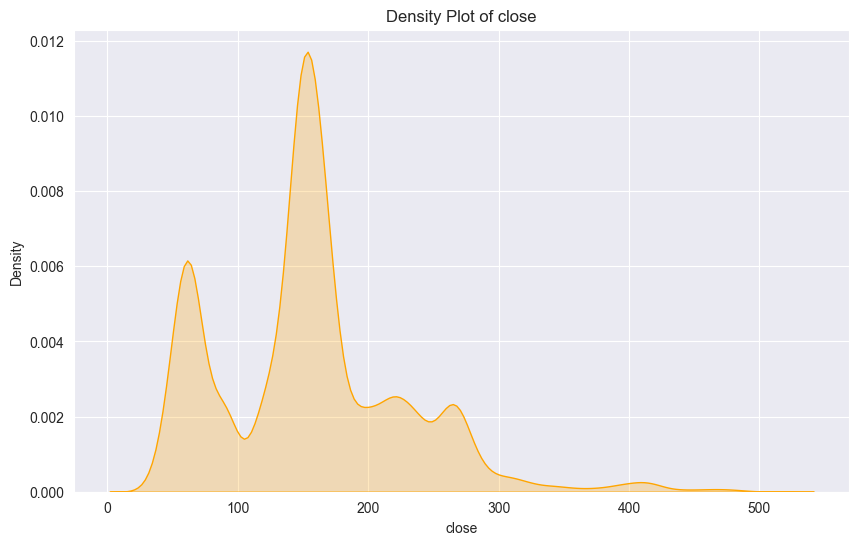

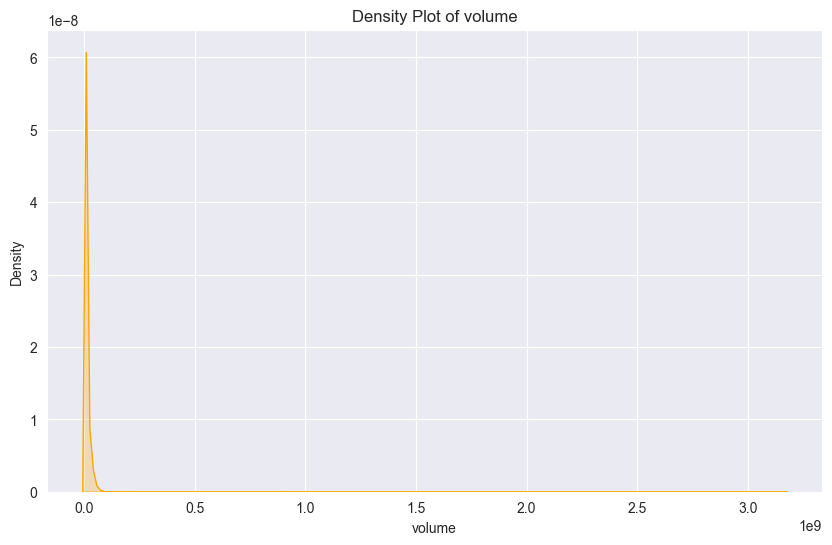

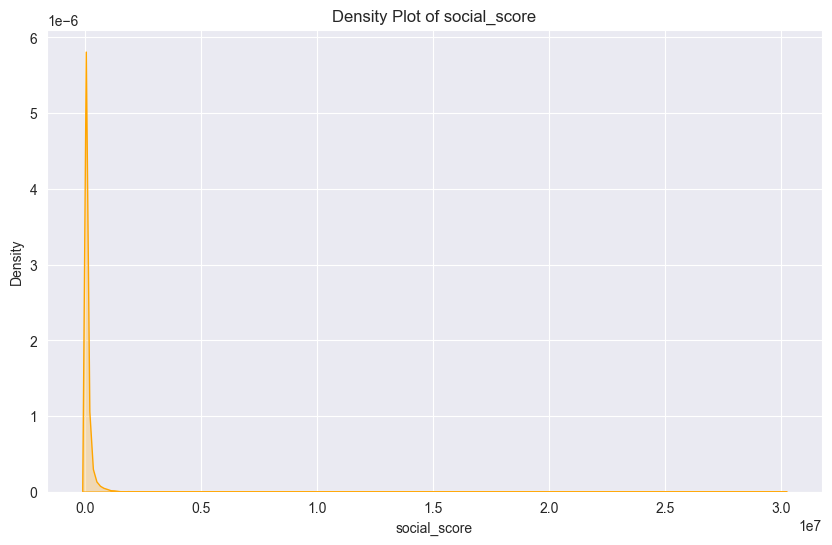

In [40]:
# Plotting density plots
plot_density_plot(df, 'close')
plot_density_plot(df, 'volume')
plot_density_plot(df, 'social_score')

In [41]:
def plot_correlation_matrix(df, features):
    # Prepare the dataset: drop rows with any missing values in the specified features
    analysis_df = df[features].dropna()

    # Calculate the Pearson correlation matrix
    correlation_matrix = analysis_df.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

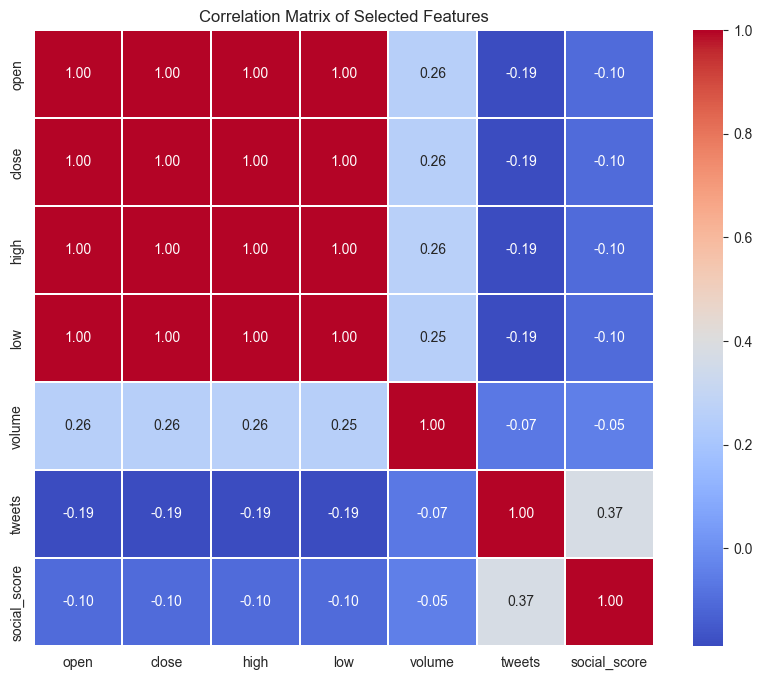

In [42]:
features_to_analyze = ['open', 'close', 'high', 'low', 'volume', 'tweets', 'social_score']

plot_correlation_matrix(df, features_to_analyze)

In [43]:
def plot_daily_price_changes(df):
    """
    Generates a box plot for daily price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including 'open' and 'close' prices.
    """
    # Calculate daily price changes
    df['daily_price_change'] = df['close'] - df['open']

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['daily_price_change'])
    plt.title('Distribution of Daily Price Changes')
    plt.xlabel('Daily Price Change')
    plt.show()

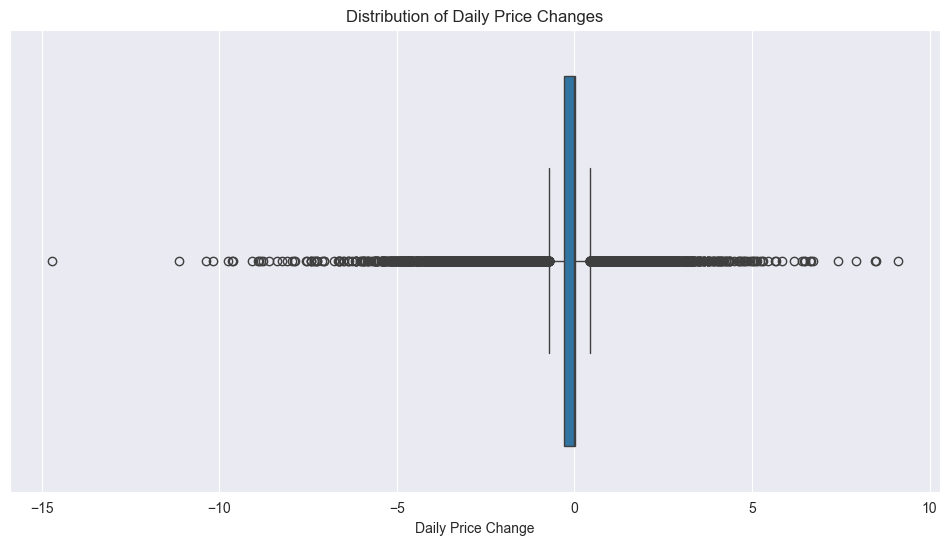

In [44]:
plot_daily_price_changes(df)

In [45]:
def plot_weekly_price_changes(df):
    """
    Generates a box plot for weekly price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including time and daily price changes.
    """
    # Ensure 'time' is in datetime format and extract week number
    df['week'] = pd.to_datetime(df['time']).dt.isocalendar().week

    # Calculate weekly price changes
    weekly_price_changes = df.groupby('week')['daily_price_change'].sum()

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=weekly_price_changes)
    plt.title('Distribution of Weekly Price Changes')
    plt.xlabel('Weekly Price Change')
    plt.show()



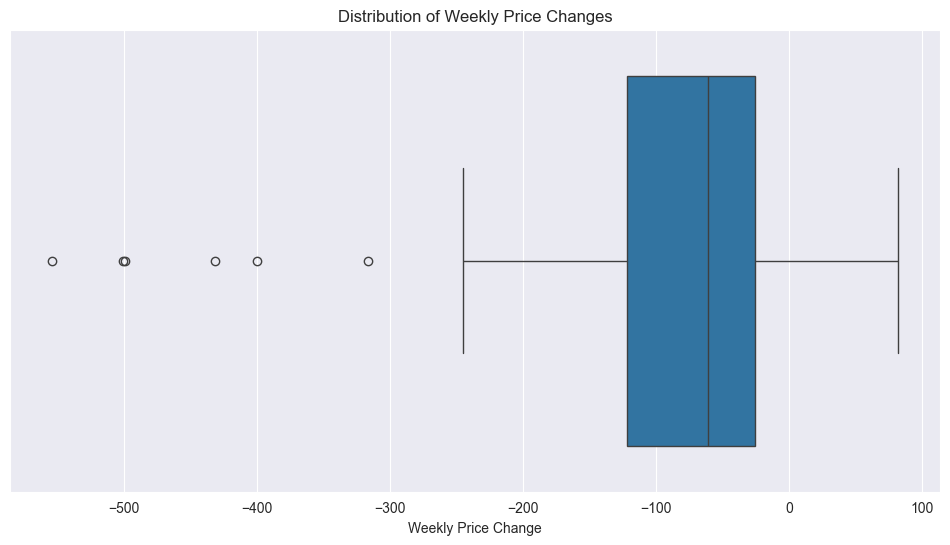

In [46]:
plot_weekly_price_changes(df)

### Data Exploring

In [47]:
missing_values_df = display_missing_values(df)
missing_values_df

,Number of Missing Values,Percentage
medium,38551,99.728373
youtube,37260,96.388659
tweet_score,35715,92.391867
search_average,33223,85.945261
news,32085,83.001345
influential_content,21751,56.268108
influential_content_score,21751,56.268108
reddit_posts,16363,42.329781
reddit_posts_score,16363,42.329781
volume,8689,22.477752


### Data Preparation


In [48]:
# Assuming 'df' is your DataFrame
threshold = 50.0  # You can adjust the threshold as needed
df = drop_columns(df, threshold)

In [49]:
missing_values_df = display_missing_values(df)
missing_values_df

,Number of Missing Values,Percentage
reddit_posts,16363,42.329781
reddit_posts_score,16363,42.329781
volume,8689,22.477752
volume_24h,8515,22.027628
circulating_supply,8248,21.336921
reddit_comments_score,7151,18.499069
reddit_comments,7151,18.499069
social_contributors,6285,16.258796
unique_url_shares,4669,12.078332
url_shares,4219,10.914218


In [50]:
df_final = impute_rolling_median(df)

/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs
/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs


In [51]:
df_final

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_volume_24h_rank,social_score_24h_rank,social_contributors,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,daily_price_change,week
0,13,1567036800,2019-08-29 00:00:00,72.370000,67.280000,72.460000,67.130000,1741238.0,68778555.58,1.157065e+09,...,17.0,9.0,22.0,1041,7988.0,0.275413,2.332637e+11,0.421833,-5.090000,35
1,13,1567123200,2019-08-30 00:00:00,66.690000,68.750000,70.000000,66.170000,1741238.0,68778555.58,1.166732e+09,...,17.0,9.0,22.0,1018,7988.0,0.275413,2.332637e+11,0.421833,2.060000,35
2,13,1567209600,2019-08-31 00:00:00,68.650000,68.070000,69.950000,66.760000,1741238.0,68778555.58,1.160993e+09,...,17.0,9.0,22.0,812,7988.0,0.275413,2.332637e+11,0.421833,-0.580000,35
3,13,1567296000,2019-09-01 00:00:00,68.130000,71.880000,74.820000,67.490000,1741238.0,68778555.58,1.235596e+09,...,17.0,9.0,22.0,864,7988.0,0.275413,2.332637e+11,0.421833,3.750000,35
4,13,1567382400,2019-09-02 00:00:00,72.050000,73.630000,74.420000,70.200000,1741238.0,68778555.58,1.260071e+09,...,17.0,9.0,22.0,1172,7988.0,0.275413,2.332637e+11,0.421833,1.580000,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38651,13,1707058800,2024-02-04 15:00:00,167.371447,166.509621,167.509406,165.572213,NaN,58957063.10,3.062668e+09,...,58.0,96.0,NaN,18,90232.0,0.019949,1.644160e+12,0.186276,-0.861826,5
38652,13,1707062400,2024-02-04 16:00:00,166.556731,166.895601,167.168411,165.330179,NaN,59438528.36,3.069774e+09,...,56.0,92.0,NaN,25,96499.0,0.025907,1.646231e+12,0.186473,0.338869,5
38653,13,1707066000,2024-02-04 17:00:00,167.071710,167.402576,167.469110,165.828033,NaN,59981892.33,3.079099e+09,...,64.0,123.0,NaN,28,89684.0,0.031221,1.645906e+12,0.187076,0.330867,5
38654,13,1707069600,2024-02-04 18:00:00,167.238606,166.809223,167.362737,165.461709,NaN,50570968.44,3.068193e+09,...,57.0,125.0,NaN,19,27503.0,0.069083,1.646132e+12,0.186388,-0.429383,5


In [52]:
output_file_path = 'data/xmr_lunarcrush_timeseries.csv'  # Specify your desired path and file name
save_to_csv(df_final, output_file_path)